In [ ]:
from google.colab import drive
drive.mount('/content/shared')

Mounted at /content/shared


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
path='/content/heart.csv'

In [ ]:
# Load data
df = pd.read_csv(path)

# Label data
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Normalize data
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['target'], test_size=0.2, random_state=42)

In [ ]:

# Feature selection with LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)

# Select features with nonzero coefficients
model = SelectFromModel(lasso, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Build CNN model
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_new.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for CNN model
X_train_new = X_train_new.reshape((X_train_new.shape[0], X_train_new.shape[1], 1))
X_test_new = X_test_new.reshape((X_test_new.shape[0], X_test_new.shape[1], 1))

# Train model
history=model.fit(X_train_new, y_train, epochs=50, batch_size=32, validation_data=(X_test_new, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7009 - loss: 0.6145 - val_accuracy: 0.7707 - val_loss: 0.4822
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8215 - loss: 0.4167 - val_accuracy: 0.7610 - val_loss: 0.4730
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8330 - loss: 0.3678 - val_accuracy: 0.7805 - val_loss: 0.4503
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8137 - loss: 0.3781 - val_accuracy: 0.7659 - val_loss: 0.4395
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.3374 - val_accuracy: 0.7805 - val_loss: 0.4307
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8712 - loss: 0.3141 - val_accuracy: 0.7854 - val_loss: 0.4262
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8811 - loss: 0.2911 - val_accuracy: 0.7610 - val_loss: 0.4162
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.2914 - val_accuracy: 0.8049 - val_loss: 0.4031
Ep

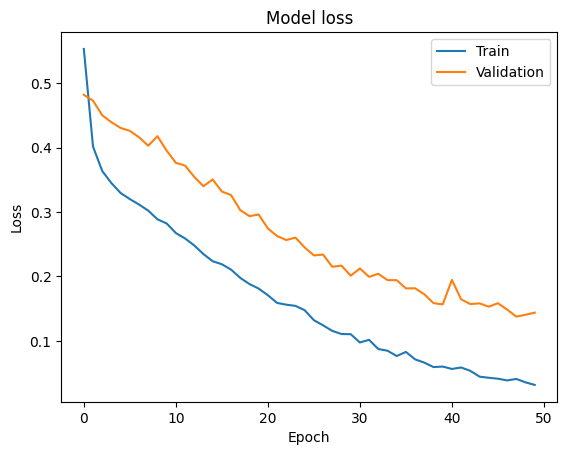

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Predict risk score for test data
y_pred = model.predict(X_test_new)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


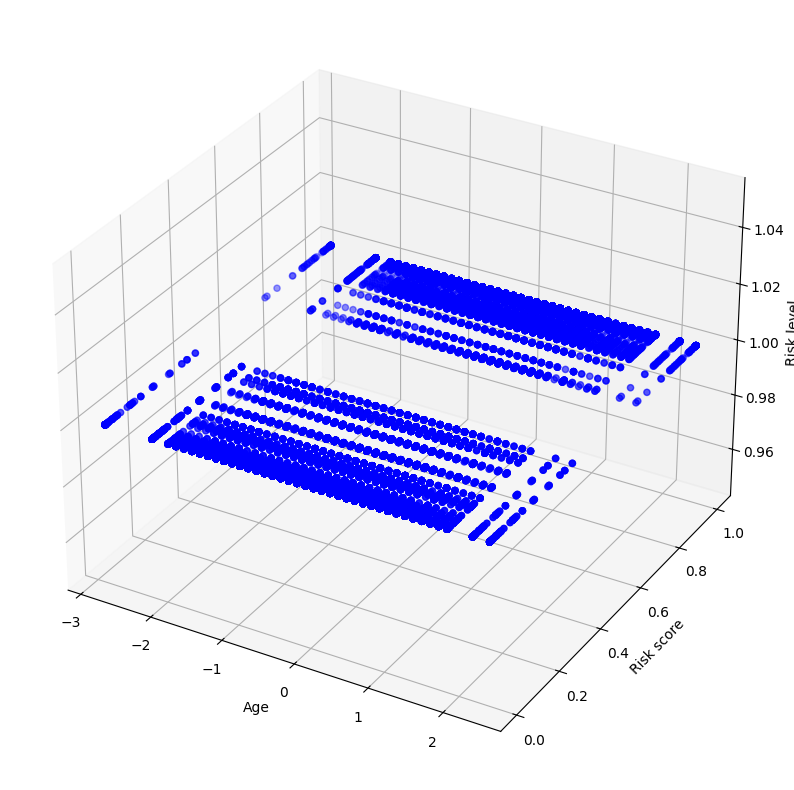

In [ ]:
# Define fuzzy logic membership functions

# If age is young and risk score is low, then risk level is low.
# If age is middle and risk score is low, then risk level is low.
# If age is old and risk score is high, then risk level is high.

def young_age(x):
    if x <= 25:
        return 1
    elif x > 25 and x < 30:
        return (30 - x) / 5
    else:
        return 0

def middle_age(x):
    if x >= 30 and x <= 45:
        return 1
    elif x > 25 and x < 30:
        return (x - 25) / 5
    elif x > 45 and x < 50:
        return (50 - x) / 5
    else:
        return 0

def old_age(x):
    if x >= 50:
        return 1
    elif x > 45 and x < 50:
        return (x - 45) / 5
    else:
        return 0

def low_risk(x):
    if x <= 0.3:
        return 1
    elif x > 0.3 and x < 0.5:
        return (0.5 - x) / 0.2
    else:
        return 0

def high_risk(x):
    if x >= 0.7:
        return 1
    elif x > 0.5 and x < 0.7:
        return (x - 0.5) / 0.2
    else:
        return 0

# Calculate membership values for age and risk score
age_membership = np.array([[young_age(age), middle_age(age), old_age(age)] for age in X_test['age']])
# Extract the numerical values from y_pred before calculating risk membership
risk_membership = np.array([[low_risk(risk[0]), high_risk(risk[0])] for risk in y_pred])

# ... (rest of the code remains the same)

# Define fuzzy rules
rule1 = np.fmax(age_membership[:, 0], risk_membership[:, 0])
rule2 = np.fmax(age_membership[:, 1], risk_membership[:, 0])
rule3 = np.fmax(age_membership[:, 2], risk_membership[:, 1])

# Apply fuzzy rules to get final risk score
risk_score = np.fmax(rule1, np.fmax(rule2, rule3))

# Plot fuzzy logic output

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['age'], y_pred, risk_score, c='b', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Risk score')
ax.set_zlabel('Risk level')
plt.show()


In [ ]:
# Convert predicted probabilities to binary predictions
y_pred_bin = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_bin)

# Print confusion matrix
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[102   0]
 [  3 100]]


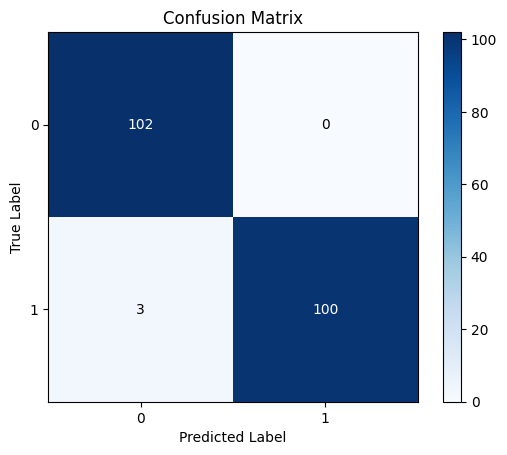

In [ ]:

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Add counts in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add axis labels and title
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['0', '1'], yticklabels=['0', '1'],
       xlabel='Predicted Label', ylabel='True Label',
       title='Confusion Matrix')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_bin)

# Calculate precision
precision = precision_score(y_test, y_pred_bin)

# Calculate recall
recall = recall_score(y_test, y_pred_bin)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_bin)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

